In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [2]:
ds_seq0=xr.open_dataset('seq0.nc')
ds_seq2=xr.open_dataset('seq2.nc')
ds_seq3=xr.open_dataset('seq3.nc')
ds_scurl0=xr.open_dataset('scurl0.nc')
ds_eq0=xr.open_dataset('eq0.nc')
ds_eq2=xr.open_dataset('eq2.nc')
ds_eq3=xr.open_dataset('eq3.nc')
ds_curl0=xr.open_dataset('curl0.nc')

geo = xr.open_dataset('/media/mesomiso/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
geo = geo.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset

In [3]:
a1=[6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]
a = [5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]

# Temperature Contours

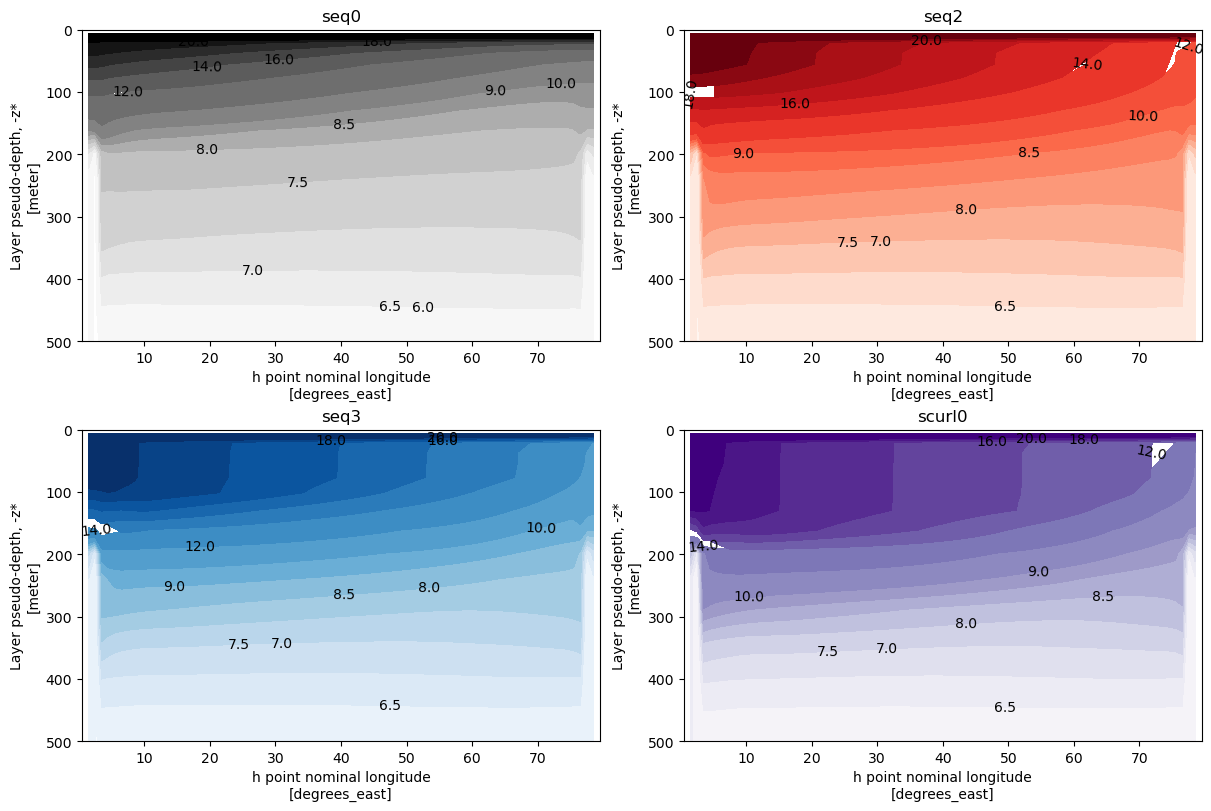

In [5]:
# Equator
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))

seq0=ds_seq0.temp.isel(yh=70).plot.contourf(ax=ax[0,0], levels=a, cmap="Greys", add_colorbar=False)
seq2=ds_seq2.temp.isel(yh=70).plot.contourf(ax=ax[0,1], levels=a, cmap="Reds", add_colorbar=False)
seq3=ds_seq3.temp.isel(yh=70).plot.contourf(ax=ax[1,0], levels=a, cmap="Blues", add_colorbar=False)
scurl0=ds_scurl0.temp.isel(yh=70).plot.contourf(ax=ax[1,1], levels=a, cmap="Purples", add_colorbar=False)

ax[0,0].clabel(seq0, fontsize=10, colors='black')
ax[0,1].clabel(seq2,  fontsize=10, colors='black')
ax[1,0].clabel(seq3, fontsize=10, colors='black')
ax[1,1].clabel(scurl0,  fontsize=10, colors='black')

ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")

ax[0, 0].set_ylim(0,500)
ax[1, 0].set_ylim(0,500)
ax[0, 1].set_ylim(0,500)
ax[1, 1].set_ylim(0,500)

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

# Isopycnals plotted on shaded contours of Control Run

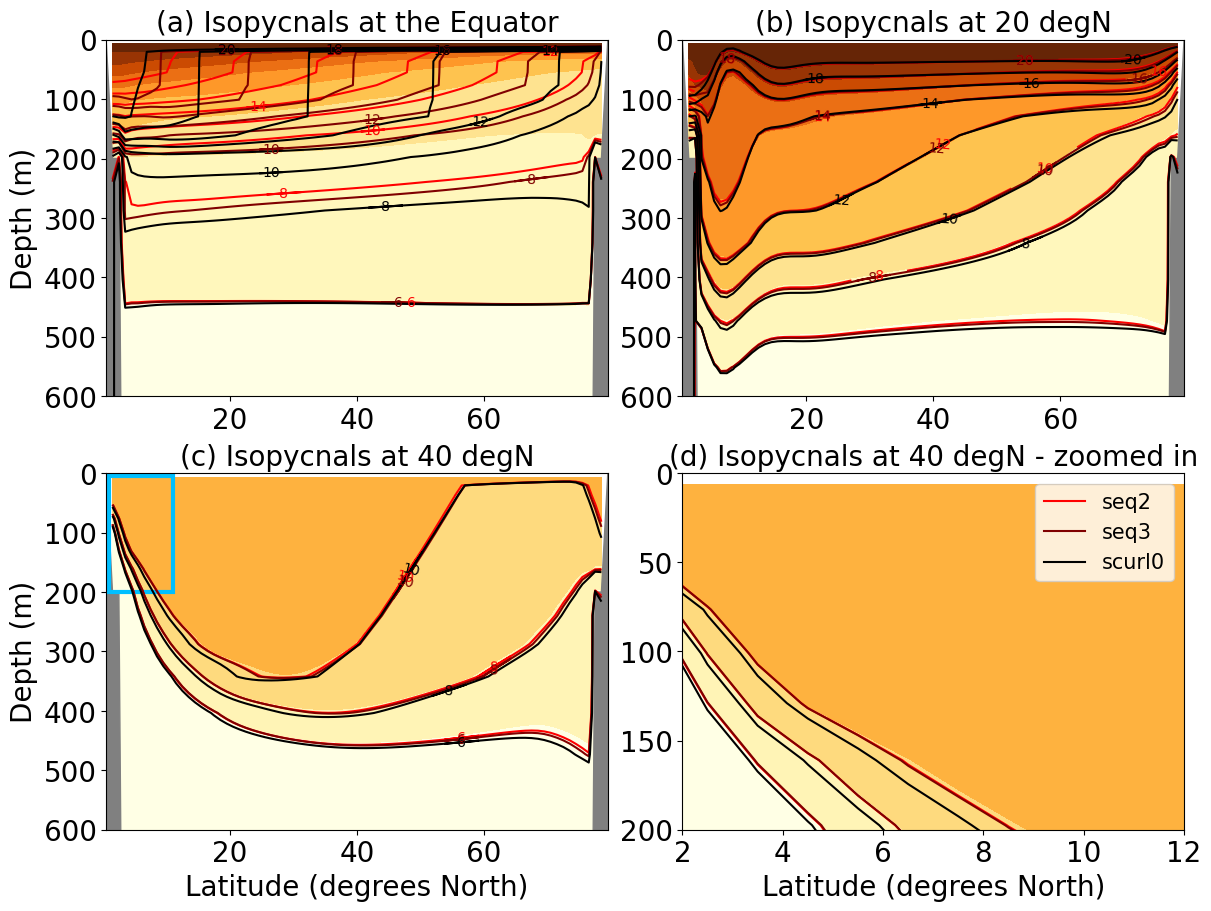

In [10]:
fig = plt.figure(constrained_layout=True, figsize=(12,9))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]

ax0 = fig.add_subplot(gs[0, 0])
seq0=ds_seq0.temp.isel(yh=70).plot.contourf(ax=ax0,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=70).plot.contour(ax=ax0,levels=a1, linewidth = 0.1, colors='red')
seq3=ds_seq3.temp.isel(yh=70).plot.contour(ax=ax0,levels=a1, linewidth = 0.1, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=70).plot.contour(ax=ax0,levels=a1, linewidth = 0.1, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,0])

ax0.fill_between(geo.D.isel(yh=70).xh, 5000, geo.D.isel(yh=70), color='grey') 
ax0.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax0.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax0.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax0.set_ylim(0,600)
ax0.invert_yaxis()
ax0.set_title('(a) Isopycnals at the Equator', fontsize=20)
ax0.tick_params(axis='both',labelsize=20)
ax0.set_xlabel('')
ax0.set_ylabel("Depth (m)", fontsize=20)

# seq0=ds_seq0.temp.isel(yh=80, Time=-1).plot.contourf(ax=ax[0,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
# seqw=ds_seq2.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='red')
# seq3=ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='maroon')
# scurl0=ds_scurl0.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,1])
# ax[0,1].fill_between(geo.D.isel(yh=70).xh, 5000, geo.D.isel(yh=70), color='black') 
# ax[0,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
# ax[0,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
# ax[0,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
# ax[0,1].set_ylim(0,600)
# ax[0,1].invert_yaxis()
# ax[0,1].set_title('Isopycnals at 10 degN', fontsize=20)
# ax[0,1].tick_params(axis='both',labelsize=20)
# ax[0,1].set_xlabel('')
# ax[0,1].set_ylabel('')

ax1 = fig.add_subplot(gs[0,1])
seq0=ds_seq0.temp.isel(yh=90).plot.contourf(ax=ax1,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=90).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=90).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=90).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,0])


ax1.fill_between(geo.D.isel(yh=90).xh, 5000, geo.D.isel(yh=90), color='grey') 
ax1.clabel(seqw, inline_spacing=19, fontsize=10, colors='r')
ax1.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax1.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax1.set_ylim(0,600)
ax1.invert_yaxis()
ax1.set_title('(b) Isopycnals at 20 degN', fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.set_xlabel('')
ax1.set_ylabel("", fontsize=20)

ax2 = fig.add_subplot(gs[1,0])
seq0=ds_seq0.temp.isel(yh=110).plot.contourf(ax=ax2,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=110).plot.contour(ax=ax2,levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])

rect = patches.Rectangle((1, 200), 10, -195, linewidth=3, edgecolor='deepskyblue', facecolor='None')

ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='grey') 
ax2.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax2.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax2.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax2.set_ylim(0,600)
ax2.add_patch(rect)
ax2.invert_yaxis()
ax2.set_title('(c) Isopycnals at 40 degN', fontsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax2.set_xlabel('Latitude (degrees North)', fontsize=20)
ax2.set_ylabel("Depth (m)", fontsize=20)

ax3 = fig.add_subplot(gs[1,1])
seq0=ds_seq0.temp.isel(yh=110).plot.contourf(ax=ax3,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=110).plot.contour(ax=ax3,levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])

# legend_eq0 = matplotlib.lines.Line2D([], [], marker='o', color='orange', label='seq0', markersize=10)
legend_eq2 = matplotlib.lines.Line2D([], [], marker='None', color='red', label='seq2', markersize=10)
legend_eq3 = matplotlib.lines.Line2D([], [], marker='None', color='maroon', label='seq3', markersize=10)
legend_no_curl = matplotlib.lines.Line2D([], [], marker='None', color='black', label='scurl0', markersize=10)

# ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='black') 
ax3.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax3.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax3.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax3.set_ylim(0,200)
ax3.set_xlim(2,12)
ax3.invert_yaxis()
ax3.set_title('(d) Isopycnals at 40 degN - zoomed in', fontsize=20)
ax3.tick_params(axis='both',labelsize=20)
ax3.set_xlabel('Latitude (degrees North)', fontsize=20)
ax3.set_ylabel("", fontsize=20)

ax3.legend(handles=[ legend_eq2, legend_eq3, legend_no_curl], fontsize=15)


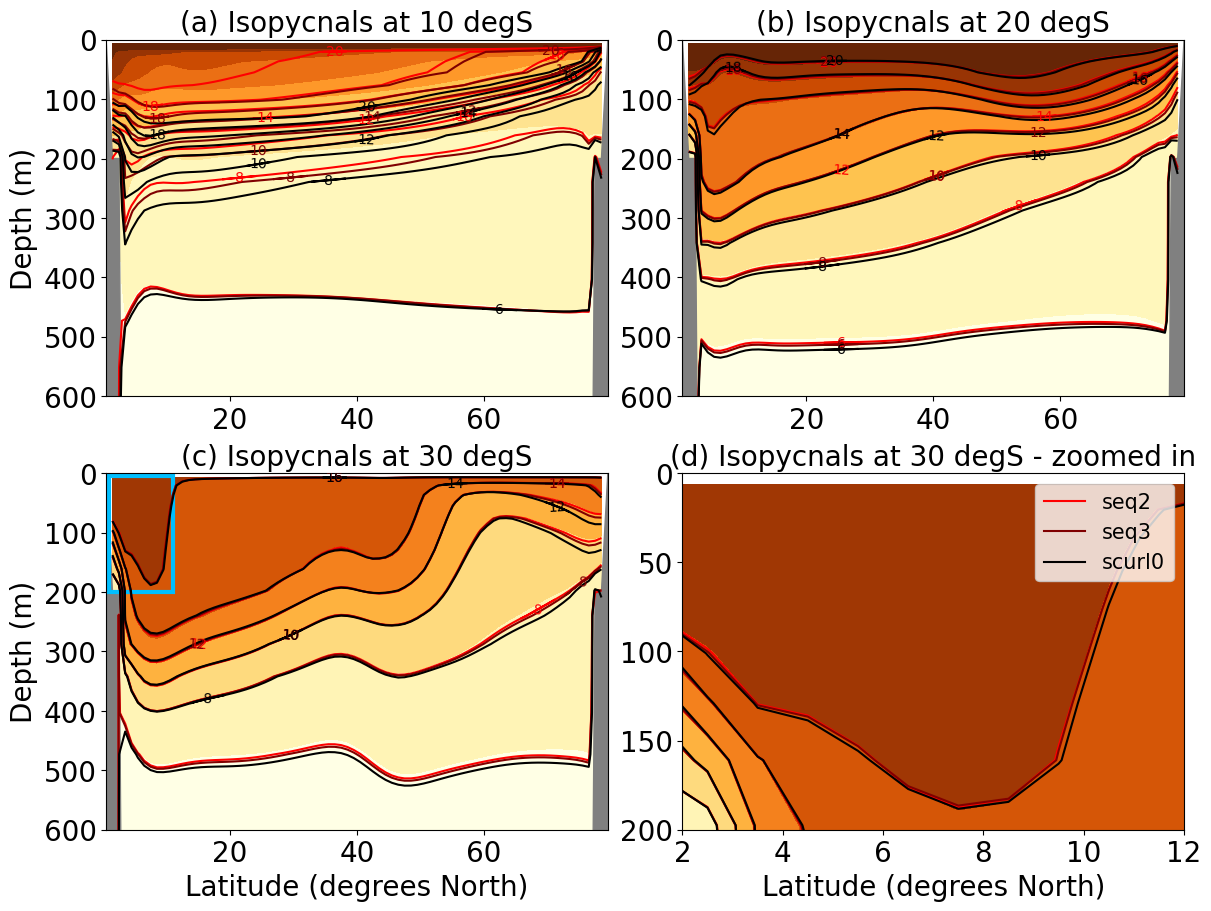

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(12,9))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
b=[6.0,7.5,9.0,10.5,12.0,13.5,15,17,19,20]


ax0 = fig.add_subplot(gs[0, 0])
seq0=ds_seq0.temp.isel(yh=60).plot.contourf(ax=ax0,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=60).plot.contour(ax=ax0,levels=a1, linewidth = 0.1, colors='red')
seq3=ds_seq3.temp.isel(yh=60).plot.contour(ax=ax0,levels=a1, linewidth = 0.1, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=60).plot.contour(ax=ax0,levels=a1, linewidth = 0.1, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,0])

ax0.fill_between(geo.D.isel(yh=70).xh, 5000, geo.D.isel(yh=70), color='grey') 
ax0.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax0.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax0.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax0.set_ylim(0,600)
ax0.invert_yaxis()
ax0.set_title('(a) Isopycnals at 10 degS', fontsize=20)
ax0.tick_params(axis='both',labelsize=20)
ax0.set_xlabel('')
ax0.set_ylabel("Depth (m)", fontsize=20)

# seq0=ds_seq0.temp.isel(yh=80, Time=-1).plot.contourf(ax=ax[0,1],levels=a1, cmap="YlOrBr",add_colorbar=False)
# seqw=ds_seq2.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='red')
# seq3=ds_seq3.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='maroon')
# scurl0=ds_scurl0.temp.isel(yh=80, Time=-1).plot.contour(ax=ax[0,1],levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[0,1])
# ax[0,1].fill_between(geo.D.isel(yh=70).xh, 5000, geo.D.isel(yh=70), color='black') 
# ax[0,1].clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
# ax[0,1].clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
# ax[0,1].clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
# ax[0,1].set_ylim(0,600)
# ax[0,1].invert_yaxis()
# ax[0,1].set_title('Isopycnals at 10 degN', fontsize=20)
# ax[0,1].tick_params(axis='both',labelsize=20)
# ax[0,1].set_xlabel('')
# ax[0,1].set_ylabel('')

ax1 = fig.add_subplot(gs[0,1])
seq0=ds_seq0.temp.isel(yh=50).plot.contourf(ax=ax1,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=50).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=50).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=50).plot.contour(ax=ax1,levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,0])


ax1.fill_between(geo.D.isel(yh=90).xh, 5000, geo.D.isel(yh=90), color='grey') 
ax1.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax1.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax1.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax1.set_ylim(0,600)
ax1.invert_yaxis()
ax1.set_title('(b) Isopycnals at 20 degS', fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.set_xlabel('')
ax1.set_ylabel("", fontsize=20)

ax2 = fig.add_subplot(gs[1,0])
seq0=ds_seq0.temp.isel(yh=40).plot.contourf(ax=ax2,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=40).plot.contour(ax=ax2,levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])

rect = patches.Rectangle((1, 200), 10, -195, linewidth=3, edgecolor='deepskyblue', facecolor='None')


ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='grey') 
ax2.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax2.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax2.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax2.set_ylim(0,600)
ax2.invert_yaxis()
ax2.add_patch(rect)
ax2.set_title('(c) Isopycnals at 30 degS', fontsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax2.set_xlabel('Latitude (degrees North)', fontsize=20)
ax2.set_ylabel("Depth (m)", fontsize=20)

legend_eq0 = matplotlib.lines.Line2D([], [], marker='None', color='orange', label='seq0', markersize=10)
legend_eq2 = matplotlib.lines.Line2D([], [], marker='None', color='red', label='seq2', markersize=10)
legend_eq3 = matplotlib.lines.Line2D([], [], marker='None', color='maroon', label='seq3', markersize=10)
legend_no_curl = matplotlib.lines.Line2D([], [], marker='None', color='black', label='scurl0', markersize=10)

ax3 = fig.add_subplot(gs[1,1])
seq0=ds_seq0.temp.isel(yh=40).plot.contourf(ax=ax3,levels=a1, cmap="YlOrBr",add_colorbar=False)
seqw=ds_seq2.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, linewidth = 0.2, colors='red')
seq3=ds_seq3.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, linewidth = 0.2, colors='maroon')
scurl0=ds_scurl0.temp.isel(yh=40).plot.contour(ax=ax3,levels=a1, linewidth = 0.2, colors='black')
# geo.D.isel(yh=70).plot(color='deepskyblue',linewidth=3,ax=ax[1,1])

# ax2.fill_between(geo.D.isel(yh=100).xh, 5000, geo.D.isel(yh=100), color='black') 
ax3.clabel(seqw, inline_spacing=-19, fontsize=10, colors='r')
ax3.clabel(seq3, inline_spacing=-19, fontsize=10, colors='maroon')
ax3.clabel(scurl0, inline_spacing=-19, fontsize=10, colors='black')
ax3.set_ylim(0,200)
ax3.set_xlim(2,12)
ax3.invert_yaxis()
ax3.set_title('(d) Isopycnals at 30 degS - zoomed in', fontsize=20)
ax3.tick_params(axis='both',labelsize=20)
ax3.set_xlabel('Latitude (degrees North)', fontsize=20)
ax3.set_ylabel("", fontsize=20)

ax3.legend(handles=[legend_eq2, legend_eq3, legend_no_curl], fontsize=15)
